In [26]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

%matplotlib inline

In [14]:
def fit_cnn(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), stride=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), stride=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), stride=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), stride=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), stride=(2,2)))

    model.add(Flatten())
    model.add(Dense(512*7*7, 4096, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(4096, 4096, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(4096, 1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [15]:
model = fit_cnn('ilscvrc2014_weights.h5')
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

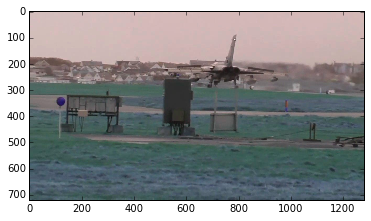

In [18]:
image = cv2.imread('0/00103.jpg')

plt.imshow(image)

In [19]:
im = cv2.resize(image, (224, 224))
im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)

In [21]:
np.argmax(model.predict(im))

912

In [22]:
import glob

In [34]:
ls_paths = glob.glob('train_data/*')
len(ls_paths)

8

In [35]:
ls_paths

['train_data/00001.jpg',
 'train_data/00013.jpg',
 'train_data/00014.jpg',
 'train_data/00022.jpg',
 'train_data/00024.jpg',
 'train_data/00025.jpg',
 'train_data/00059.jpg',
 'train_data/00063.jpg']

In [36]:
ls_predictions = []

for path in ls_paths:
    
    im = cv2.imread(path)
    im = cv2.resize(im, (224, 224))
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    
    ls_predictions.append((path, np.argmax(model.predict(im))))

In [39]:
ls_cnn_predictions

[('train_data/00001.jpg', 349),
 ('train_data/00013.jpg', 172),
 ('train_data/00014.jpg', 270),
 ('train_data/00022.jpg', 349),
 ('train_data/00024.jpg', 349),
 ('train_data/00025.jpg', 977),
 ('train_data/00059.jpg', 354),
 ('train_data/00063.jpg', 972)]

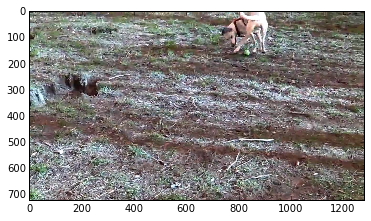

In [44]:
plt.imshow(cv2.imread(ls_cnn_predictions[4][0]))